# Exploratory Data Analysis

File Name: exploratory_data_analysis.ipynb
Purpose: Data visualization (Fig 3)
Outline:
1. Response Facility in Canadian Arctic
2. Sensitive areas
3. Draw shipping routes
4. Draw Hypothetical oil spills

Developer: Tanmoy Das
Date: March 2023

In [1]:
# Import Python libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import custom_func
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load geometric file for map
ArcticMap = gpd.read_file("../data/gis map/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticWater = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic-Water'])]

current_st = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current')
acp2 = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations')

spill_data = pd.read_excel('../data/processed/data_100_oil_spills.xlsx', sheet_name='spills', header=0).copy()

# Load geometric file for map
gerome_ = gpd.read_file("../data/gis map/ArcGIS_data/Gerome2/Sensitivity_data_Gerome.shp")
marine_protective_area = gpd.read_file("../data/gis map/ArcGIS_data/Northern_Canada_2011/shapefiles/LCC_NAD83/prot_areas_p.shp")
indigenous_population = gpd.read_file("../data/gis map/ArcGIS_data/Northern_Canada_2011/shapefiles/LCC_NAD83/popplace_pt.shp")

file_url = "../data/gis map//ArcGIS_data/Shipping_and_Hydrography/Canadian_Shipping_Routes.shp"
name = 'shipping_route'


In [3]:
current_st

,Station #,FacilityLocation,Coordinates,m,c,r,Capacity
0,s6,Hay River,"(60.758054, -115.789890)",0,1400,4000,700
1,s9,Churchill,"(58.55084,-93.62352)",78,800,800,200
2,s200,Tuktoyaktuk,"(69.459, -132.974304)",50,100,257,250
3,s300,Iqaluit,"(63.742885, -68.464958)",24,200,400,300


In [4]:
coordinates_current_st = custom_func.extract_station_coordinate(current_st)
coordinate_current_st_df = pd.DataFrame(coordinates_current_st[0])
coordinate_current_st_df.columns = ['Latitude','Longitude']
coordinate_current_st_df['Capacity'] = current_st['Capacity'].copy()
coordinate_current_st_df['FacilityLocation'] = current_st['FacilityLocation'].copy()

coordinates_acp = custom_func.extract_station_coordinate(acp2)
coordinate_df_acp = pd.DataFrame(coordinates_acp[0])
coordinate_df_acp.columns = ['Latitude','Longitude']
coordinate_df_acp['Capacity'] = acp2['Capacity'].copy()

# Fig3

## (a) Current response stations and cache

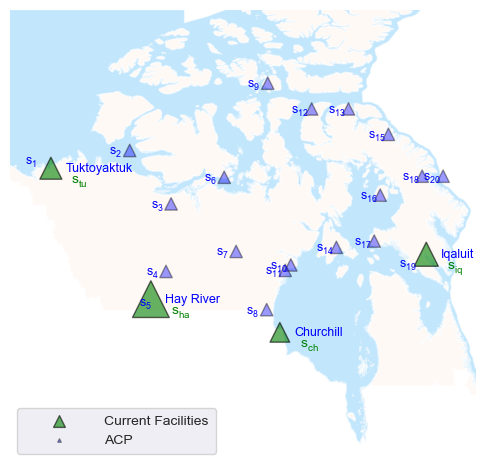

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)
acp03 = pd.concat([coordinate_df_acp, acp2], axis=1)
acp03.rename(columns={"Station #": "StationNo"}, inplace=True)

st_name = ['$s_{ha}$', '$s_{ch}$', '$s_{tu}$', '$s_{iq}$']
acp_name = ['$idx$' for idx in acp03.StationNo]

#acp_name = [idx for idx in acp03.StationNo]
acp_name = ['$s_1$',  '$s_2$',  '$s_3$',  '$s_4$', '$s_5$',  '$s_6$', '$s_7$',  '$s_8$', '$s_9$',  '$s_{10}$','$s_{11}$','$s_{12}$','$s_{13}$','$s_{14}$','$s_{15}$',
            '$s_{16}$','$s_{17}$','$s_{18}$','$s_{19}$','$s_{20}$',]

params = {'mathtext.default':'regular'}
plt.rcParams.update(params)

st = plt.scatter(data=coordinate_current_st_df,
                 x='Longitude', y='Latitude', marker='^', alpha=0.6, s='Capacity',
                 c='green', edgecolors='black')

# Hayriver, churchil
for i in range(len(coordinate_current_st_df)):
    plt.text(x=coordinate_current_st_df.Longitude[i] + 2.5, y=coordinate_current_st_df.Latitude[i] - .25,
             s=coordinate_current_st_df.FacilityLocation[i],  # loc[:, 'Station #'][i],
             fontdict=dict(color='blue', size=9))

# s_tu, s_ha
for i in range(len(coordinate_current_st_df)):
    plt.text(x=coordinate_current_st_df.Longitude[i] + 3.5, y=coordinate_current_st_df.Latitude[i] - 1,
             s=st_name[i], fontdict=dict(color='green', size=10))

# Facility location

acp22 = plt.scatter(data=coordinate_df_acp,
                 x='Longitude', y='Latitude', marker='^', alpha=0.4, s='Capacity',
                 c='blue', edgecolors='black')
# s1, s2, s3
for i in range(len(acp03)):
    plt.text(x=acp03.Longitude[i] - 3.5, y=acp03.Latitude[i] - .25,
             s=acp_name[i],  # loc[:, 'Station #'][i],
             fontdict=dict(color='blue', size=9))

plt.legend((st, acp22),
           ('Current Facilities', 'ACP'),
           loc='lower left',
           ncol=1, handlelength=5, borderpad=.5, markerscale=.4,
           fontsize=10)


ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
plt.axis('off')
#plt.show()
plt.tight_layout()
fig.savefig(f'../plots/Fig3a current facilities & ACP.png', transparent=False, dpi = 350)

## (b) Sensitive areas

In [6]:

gerome_shp = gerome_.to_crs(epsg=4326)
marine_protective_area = marine_protective_area.to_crs(epsg=4326)
indigenous_population_area = indigenous_population.to_crs(epsg=4326)

In [7]:
gerome_shp['Sensitivity_n'] = (gerome_shp['Sensitivit']-min(gerome_shp['Sensitivit']))/(max(gerome_shp['Sensitivit'])-min(gerome_shp['Sensitivit']))

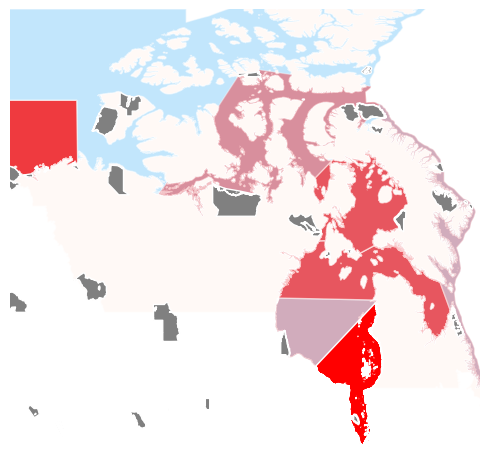

In [8]:
fig, ax = plt.subplots(figsize=(5,5))  #++ figsize=(8,8)
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)

gerome_plot = gerome_shp.plot(ax=ax, color='red', alpha=gerome_shp['Sensitivity_n']) # color="lightskyblue",
mpa_plot = marine_protective_area.plot(ax=ax, color='gray', zorder=2)


ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
plt.tight_layout()
# fig.savefig(f'../plots/Fig 3b Sensitivity only.png', transparent=True)

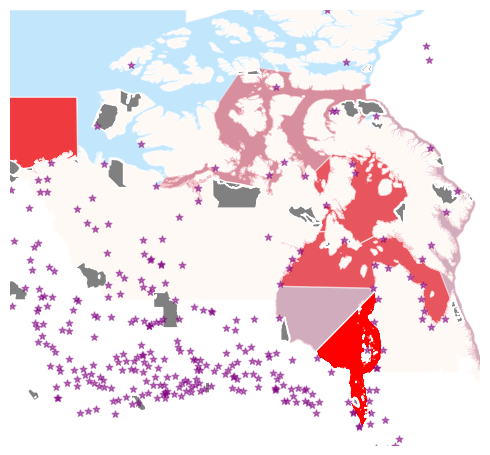

In [9]:
fig, ax = plt.subplots(figsize=(5,5))  #++ figsize=(8,8)
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=0.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=0.5)

gerome_plot = gerome_shp.plot(ax=ax, color='red', alpha=gerome_shp['Sensitivity_n']) # color="lightskyblue",
mpa_plot = marine_protective_area.plot(ax=ax, color='gray', zorder=2)

mpa_plot = indigenous_population_area.plot(ax=ax, marker='*',markersize=25, color='purple', zorder=3, alpha=.5)


ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
plt.tight_layout()
fig.savefig(f'../plots/Fig3b Sensitivity & population.png', transparent=False, dpi = 310)

## (c) Shipping route

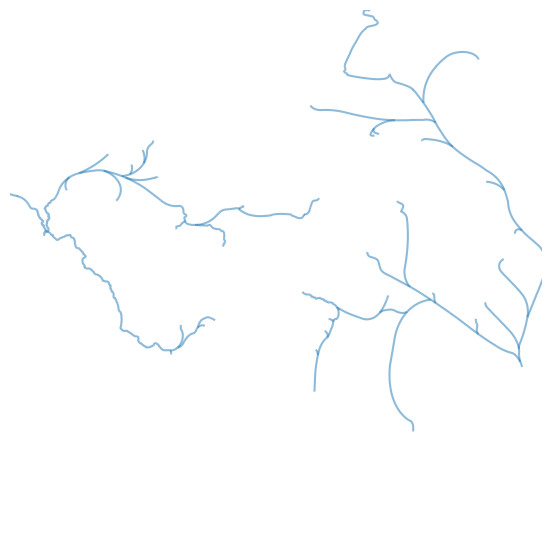

In [10]:
#Map_Plot = eda.plot_shp_to_transparent_fig(file_url, name)
fig, ax = plt.subplots(figsize=(8,7))  #++ figsize=(8,8)
# plt.figure()
# Load geometric file for map
Map_shp = gpd.read_file(file_url)
Map_shp = Map_shp.to_crs(epsg=4326)  # 3857
Map_Plot = Map_shp.plot(ax=ax,  alpha=.5) # color="lightskyblue",
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
ax.axis('off')
fig.savefig(f'../plots/{name}.png', transparent=True)

## (d) Oil spills

In [11]:

name = 'Fig3d oil spills'

coordinates = custom_func.extract_coordinate(spill_data)
coordinate_df = pd.DataFrame(coordinates[0])
coordinate_df.columns = ['Latitude', 'Longitude']
coordinate_gdf = gpd.GeoDataFrame(
    coordinate_df, geometry=gpd.points_from_xy(coordinate_df.Longitude, coordinate_df.Latitude))
coordinate_gdf = coordinate_gdf.set_crs(epsg=4326)

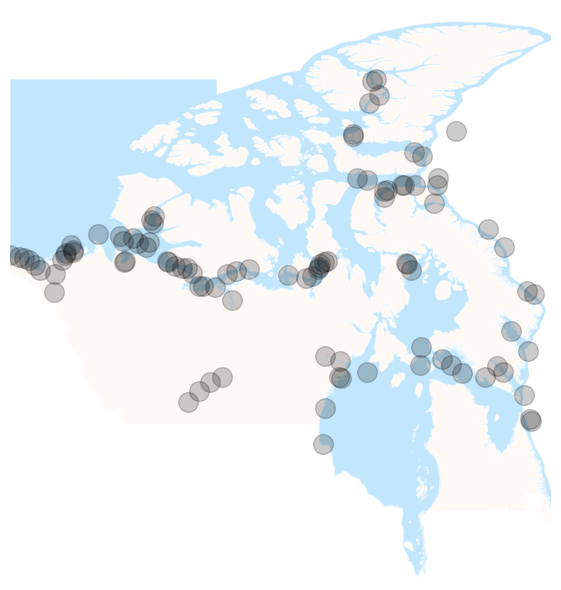

In [12]:
fig, ax = plt.subplots(figsize=(6,6))

ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)

plt.scatter(data=coordinate_gdf,
                 x='Longitude', y='Latitude', marker='o', alpha=.2, s=200,
                 # s=amountSt_groupby['amountSt_display'],
                 c='black')

ax.set_xlim([-141, -60])
ax.set_ylim([51, 84])
ax.axis('off')
plt.tight_layout()
plt.show()
fig.savefig(f'../plots/{name}400.png', transparent=False, dpi=400)